In [120]:
import numpy as np
from colour import Color
from matplotlib import colors
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import gif

#CUSTOM CMAP
def customcmap(t_i, t_r):
    s = Color("#f5ebeb")
    i1 = Color("#5e0202")
    i2 = Color("#e81717")
    r1 = Color("#e8c917")
    r2 = Color("#e8db90")
    clist = [s] + list(i1.range_to(i2, t_i - 1)) + list(r1.range_to(r2, t_r))
    clist = [c.hex for c in clist]
    
    return colors.ListedColormap(clist)


#PROPOGATOR FUNCTION
def propogator(tau_t,x_dim,y_dim,t_i,t_r,det_prob):
    #looping through all the blocks (except the boundaries)
    t=tau_t.copy()  #use .copy() to prevent simaltaneous changes in both t and tau_t
    count=0
    for i in np.arange(1,x_dim+1):
        for j in np.arange(1,y_dim+1):
            #for susceptible individuals (Using MOORE Neighbourhood)
            if(tau_t[i][j]==0):    
                count=0
                probability=0    
                if(1<=tau_t[i-1][j]<=t_i): #any infected cell with t between 1 and t_i infects others by adding a count
                    count=count+1
                if(1<=tau_t[i][j-1]<=t_i):
                    count=count+1
                if(1<=tau_t[i+1][j]<=t_i):
                    count=count+1
                if(1<=tau_t[i][j+1]<=t_i):
                    count=count+1
                if(1<=tau_t[i-1][j-1]<=t_i):
                    count=count+1
                if(1<=tau_t[i-1][j+1]<=t_i):
                    count=count+1
                if(1<=tau_t[i+1][j+1]<=t_i):
                    count=count+1
                if(1<=tau_t[i+1][j-1]<=t_i):
                    count=count+1

                probability=count/8
                x=np.random.random()
                if(x<=probability*det_prob): #if det_prob=8, even a single infected neighbour can infect, for det_prob=1, we get the standard probabilistic model.
                    t[i][j]=1
                
            #for infected and refractory
            elif(1<=tau_t[i][j]<t_i+t_r):
                t[i][j]=t[i][j]+1
                
            #last stage (tau_0----->0)
            elif(tau_t[i][j]==t_i+t_r):
                t[i][j]=0
    #BOUNDARY CONDITIONS (just recovered after getting infected)
    t[:,0]=t_i+1
    t[0,:]=t_i+1
    t[:,x_dim+1]=t_i+1
    t[y_dim+1,:]=t_i+1
    
    return t


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


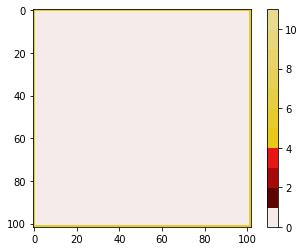

In [121]:
#MAIN PROGRAM
#parameters
det_prob=8 #Deterministic(1) or Probablistic(0) Automata
t_i=4                        # 1<=t<=t_i is the infected range
t_r=7                        # t_i+1<=t<=t_i+t_r is the refractory range
x_dim=100
y_dim=100
time=80
cmap = customcmap(t_i, t_r)

#------INITIAL CONDITIONS-----------------#
#Distribution of Initial Population

p=0.001  #initial percentage of infected individuals 
tau_list=np.zeros(((x_dim + 2)*(y_dim + 2)), dtype=int)     
for k in range ((x_dim + 2)*(y_dim + 2)):
    rand=np.random.random()
    if(0<=rand<p):
        tau_list[k]=tau_list[k]+1
    elif(p<=rand<=1):
        tau_list[k]=tau_list[k]+0
    
tau=np.reshape(tau_list,(x_dim+2,y_dim+2))
#BOUNDARY CONDITIONS (just recovered after getting infected)
tau[:,0]=t_i+1
tau[0,:]=t_i+1
tau[:,x_dim+1]=t_i+1
tau[y_dim+1,:]=t_i+1

#-------------------------------------------#
fig=plt.figure()
state=tau.copy()
plt.colorbar(plt.imshow(state, cmap=cmap, interpolation = 'nearest', vmin = 0, vmax = t_i+t_r))
ims=[] 
im=plt.imshow(state, animated=True, cmap = cmap, vmin = 0, vmax = t_i+t_r)
ims.append([im])
for t in range(time):
    state_new=propogator(state,x_dim,y_dim,t_i,t_r,det_prob)
    state=state_new.copy()
    if(t%1==0):
        im=plt.imshow(state, animated=True, cmap = cmap, vmin = 0, vmax = t_i+t_r)
        ims.append([im])

ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('SIRSmodel_det.gif', writer='imagemagick', fps=7)
plt.show()
#check for changes on github
